<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [13]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [14]:
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Math for 8th grade

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [15]:
len(pd.unique(df['YEAR']))

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [16]:
# Take the mean of all AVG_MATH_8_SCORE values when STATE is MICHIGAN. Then repeat with OHIO. Disregard NaN.
mich = np.nanmean(df.loc[df['STATE'] == 'MICHIGAN', 'AVG_MATH_8_SCORE'].values)
ohio = np.nanmean(df.loc[df['STATE'] == 'OHIO', 'AVG_MATH_8_SCORE'].values)

print(f'{"Michigan" if mich > ohio else "Ohio"} has the higher average outcome score across all years')

Ohio has the higher average outcome score across all years


Find the average for your outcome score across all states in 2019

In [17]:
# Take the mean of all AVG_MATH_8_SCORE values when YEAR is 2019. Disregard NaN.
np.nanmean(df.loc[df['YEAR'] == 2019, 'AVG_MATH_8_SCORE'].values)

281.2641509433962

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [18]:
states = set()
for state in df['STATE']:
    if state in ['DISTRICT_OF_COLUMBIA', 'NATIONAL', 'DODEA']:
        continue

    # Take the max of all AVG_MATH_8_SCORE values when STATE is current state in for loop. Disregard NaN.
    if state not in states:
        print(f"{state}'s maximum outcome score is {np.nanmax(df.loc[df['STATE'] == state, 'AVG_MATH_8_SCORE'].values)}")
    states.add(state)

ALABAMA's maximum outcome score is 269.0
ALASKA's maximum outcome score is 283.0
ARIZONA's maximum outcome score is 283.0
ARKANSAS's maximum outcome score is 279.0
CALIFORNIA's maximum outcome score is 277.0
COLORADO's maximum outcome score is 292.0
CONNECTICUT's maximum outcome score is 289.0
DELAWARE's maximum outcome score is 284.0
FLORIDA's maximum outcome score is 281.0
GEORGIA's maximum outcome score is 281.0
HAWAII's maximum outcome score is 281.0
IDAHO's maximum outcome score is 287.0
ILLINOIS's maximum outcome score is 285.0
INDIANA's maximum outcome score is 288.0
IOWA's maximum outcome score is 286.0
KANSAS's maximum outcome score is 290.0
KENTUCKY's maximum outcome score is 282.0
LOUISIANA's maximum outcome score is 273.0
MAINE's maximum outcome score is 289.0
MARYLAND's maximum outcome score is 288.0
MASSACHUSETTS's maximum outcome score is 301.0
MICHIGAN's maximum outcome score is 280.0
MINNESOTA's maximum outcome score is 295.0
MISSISSIPPI's maximum outcome score is 274.

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [19]:

for expenditure in ['INSTRUCTION', 'SUPPORT_SERVICES', 'CAPITAL_OUTLAY', 'OTHER']:
    df[f'{expenditure}_EXPENDITURE_PER_TOTAL_REVENUE'] = df[f'{expenditure}_EXPENDITURE'] / df['TOTAL_REVENUE']
    

Final feature list: 

INSTRUCTION_EXPENDITURE_PER_TOTAL_REVENUE

SUPPORT_SERVICES_EXPENDITURE_PER_TOTAL_REVENUE

CAPITAL_OUTLAY_EXPENDITURE_PER_TOTAL_REVENUE

OTHER_EXPENDITURE_PER_TOTAL_REVENUE

Feature selection justification: I'm most curious how expenditure can be used most efficiently to increase the 8th grade math scores. For this, I made a feature for each type of expenditure standardized over the school's total revenue


<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

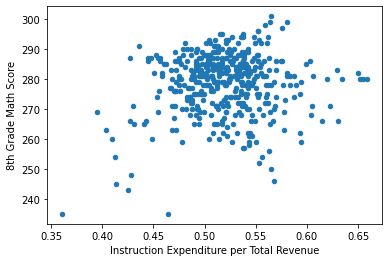

In [20]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_TOTAL_REVENUE',y='AVG_MATH_8_SCORE')
plt.xlabel('Instruction Expenditure per Total Revenue')
plt.ylabel('8th Grade Math Score')

An increase in instruction expenditure per total revenue is weakly positively correlated with the school's 8th grade math scores.

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

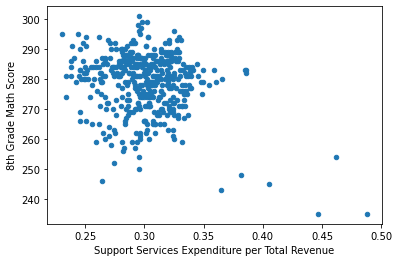

In [21]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_TOTAL_REVENUE',y='AVG_MATH_8_SCORE')
plt.xlabel('Support Services Expenditure per Total Revenue')
plt.ylabel('8th Grade Math Score')

An increase in support services expenditure per total revenue is weakly negatively correlated with the school's 8th grade math scores.

**Extra: Visualization 3**

Text(0, 0.5, '8th Grade Math Score')

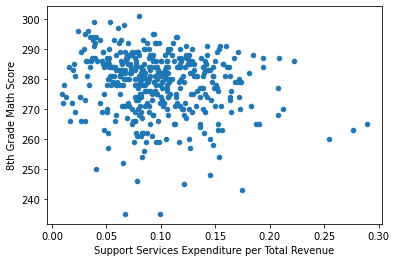

In [22]:
df.plot.scatter(x='CAPITAL_OUTLAY_EXPENDITURE_PER_TOTAL_REVENUE',y='AVG_MATH_8_SCORE')
plt.xlabel('Support Services Expenditure per Total Revenue')
plt.ylabel('8th Grade Math Score')

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Have lots of NaNs for y, so remove all rows that contain NaNs
NaNs = df.index[df['AVG_MATH_8_SCORE'].isna() == True].tolist()
df = df.drop(NaNs)

X = df[['INSTRUCTION_EXPENDITURE_PER_TOTAL_REVENUE', 'SUPPORT_SERVICES_EXPENDITURE_PER_TOTAL_REVENUE',
        'CAPITAL_OUTLAY_EXPENDITURE_PER_TOTAL_REVENUE', 'OTHER_EXPENDITURE_PER_TOTAL_REVENUE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **REGRESSION**

In [26]:
# import your sklearn class here
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold # for cross validation
from sklearn import metrics # for F1 Score

In [27]:
# create your model here

# do random search to find optimal values for hyperparameters
C_range = 10 ** np.random.uniform(-3, 3, (25, 1))

skf = StratifiedKFold(n_splits=2)

best_C_val, best_r_val = 0.0, 0.0
best_performance = 0

# extract X and y values into numpy arrays for easier computation
X_ = np.array(X_train[['INSTRUCTION_EXPENDITURE_PER_TOTAL_REVENUE', 'SUPPORT_SERVICES_EXPENDITURE_PER_TOTAL_REVENUE',
        'CAPITAL_OUTLAY_EXPENDITURE_PER_TOTAL_REVENUE', 'OTHER_EXPENDITURE_PER_TOTAL_REVENUE']].values)
y_ = np.array(y_train.tolist())

for C in C_range:
        model = LinearSVC(C=C, loss='hinge', penalty='l2', dual=True)
        scores = []

        # do 2-fold cross validation for each expenditure
        for train_index, test_index in skf.split(X_, y_):
            X_train_, X_test_ = X_[train_index], X_[test_index]
            y_train_, y_test_ = y_[train_index], y_[test_index]

            model.fit(X_train_, y_train_)

            y_pred_ = model.predict(X_test_)
            
            # select hyperparamters that maximize F1 Score
            scores.append(metrics.f1_score(y_test_, y_pred_, average='weighted'))
        
        cur_performance = np.array(scores).mean()

        if cur_performance > best_performance:
            best_C = C
            best_performance = cur_performance


model = LinearSVC(C=best_C, loss='hinge', penalty='l2', dual=True)

In [28]:
model.fit(X_train, y_train)

LinearSVC(C=array([1.07143069]), loss='hinge')

In [29]:
y_pred = model.predict(X_test)

In [19]:
"""
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)
"""

'\n# FOR CLASSIFICATION ONLY:\nfrom sklearn.metrics import plot_confusion_matrix\n\nplot_confusion_matrix(model, X_test, y_test,\n                         cmap=plt.cm.Blues)\n'

Text(0, 0.5, '8th Grade Math Scores')

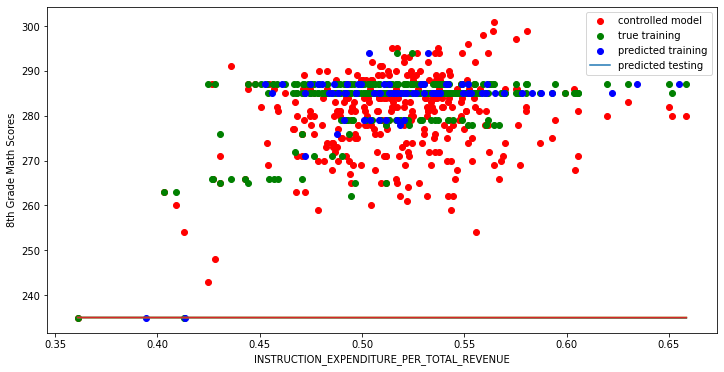

In [30]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE_PER_TOTAL_REVENUE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x.reshape(new_x.shape[0], -1)*model.coef_[col_index]) #reshaped new_x because I was getting broadcasting errors

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("8th Grade Math Scores")

<h2> Summary </h2>

I found that Instruction Expenditure normalized to the school's total revenue correlates heavily with 8th grade math scores because the error for the model was low. If a school can tweak its spendings to allow more instruction expenditure and less support services and capital outlays expenditures, it will likely see an increase in 8th grade math scores. The model was trained using a Support Vector Machine with linear kernel and regularization parameter chosen with 2-fold cross validation and random search. 